In [16]:
import numpy as np
import pandas as pd
import datetime as dt
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
data_filename = "./Data_2023_24/Train_DailyData.xlsx"
weight_filename = "./Data_2023_24/stock_weight.csv"

In [3]:
INIT_FUND = 1e9

print(f"Initial fund available: {INIT_FUND}")

stock_data = pd.read_excel(data_filename, header=[0,1], index_col=0, parse_dates=True)
wgt_data = pd.read_csv(weight_filename, index_col=0)

Initial fund available: 1000000000.0


In [4]:
stock_data.head()

symbol      STOCK_1                                   STOCK_2                  \
           close_px high_px  low_px open_px   volume close_px high_px  low_px   
date                                                                            
2019-01-02   38.437  39.477  38.292  38.726  1542382   25.548  26.055  23.888   
2019-01-03   37.888  38.697  37.570  38.350  2032801   25.871  26.655  24.995   
2019-01-04   39.015  39.015  37.310  37.570  4310272   25.640  26.240  25.271   
2019-01-07   38.408  39.159  38.148  39.159  3313083   25.502  25.871  25.133   
2019-01-08   37.974  38.321  37.512  38.321  1790273   25.548  25.963  25.271   

symbol                       ... STOCK_99                                   \
           open_px   volume  ... close_px high_px  low_px open_px   volume   
date                         ...                                             
2019-01-02  23.980  3776860  ...   18.422  18.844  18.362  18.844  3728350   
2019-01-03  25.687  3562088  ...   18.723  18.734  18.172  18.262  5252048   
2019-01-04  25.548  3244056  ...   19.245  19.245  18.172  18.523  6685195   
2019-01-07  25.687  2433297  ...   19.566  19.797  18.924  19.245  8148252   
2019-01-08  25.502  1415861  ...   18.683  19.516  18.673  19.426  6576997   

symbol     STOCK_100                                   
            close_px high_px  low_px open_px   volume  
date                                                   
2019-01-02    35.772  36.619  35.509  36.619  1758284  
2019-01-03    36.210  36.707  35.772  35.772  1370137  
2019-01-04    35.626  36.064  34.924  35.567  1996299  
2019-01-07    36.152  36.239  35.363  35.743  2060829  
2019-01-08    35.421  36.123  34.807  36.123  2155296  

[5 rows x 500 columns]

In [5]:
sum(wgt_data.values)

array([1.000001])

In [6]:
stock_weights = wgt_data.to_dict()['weight']
stock_weights

{'STOCK_1': 0.004109,
 'STOCK_2': 0.004514,
 'STOCK_3': 0.006742,
 'STOCK_4': 0.019414,
 'STOCK_5': 0.004345,
 'STOCK_6': 0.003766,
 'STOCK_7': 0.005952,
 'STOCK_8': 0.031675,
 'STOCK_9': 0.008034,
 'STOCK_10': 0.006604,
 'STOCK_11': 0.002892,
 'STOCK_12': 0.05,
 'STOCK_13': 0.005773,
 'STOCK_14': 0.006563,
 'STOCK_15': 0.005106,
 'STOCK_16': 0.009172,
 'STOCK_17': 0.006935,
 'STOCK_18': 0.011952,
 'STOCK_19': 0.017284,
 'STOCK_20': 0.007689,
 'STOCK_21': 0.004918,
 'STOCK_22': 0.005773,
 'STOCK_23': 0.006013,
 'STOCK_24': 0.005697,
 'STOCK_25': 0.006865,
 'STOCK_26': 0.004586,
 'STOCK_27': 0.002237,
 'STOCK_28': 0.007351,
 'STOCK_29': 0.00622,
 'STOCK_30': 0.003342,
 'STOCK_31': 0.005645,
 'STOCK_32': 0.001863,
 'STOCK_33': 0.01488,
 'STOCK_34': 0.008675,
 'STOCK_35': 0.003903,
 'STOCK_36': 0.012583,
 'STOCK_37': 0.002984,
 'STOCK_38': 0.004424,
 'STOCK_39': 0.002545,
 'STOCK_40': 0.00329,
 'STOCK_41': 0.00377,
 'STOCK_42': 0.00326,
 'STOCK_43': 0.005966,
 'STOCK_44': 0.005404,
 'STOC

### Strategy Parameters

In [7]:
# Max position
max_pos_ratio = 0.9 # Use 50% of available fund and allocate to each of the 20 stocks by their weight defined above
# PX_column
PX_COL = "close_px" # use close px of every 5min (we use the 5min candlestick) to enter our position


In [8]:
stock_list = wgt_data.index.to_list()

### Prepare allocation

In [9]:
# strategy parameters
curr_fund = INIT_FUND
start = True

# the dataframe to store your allocation
position = pd.DataFrame()
# the series to store fund not used
unused_fund = pd.Series(dtype=float)

In [10]:
for ts, datarow in stock_data.iterrows():
    print(f"Working on {ts}...", flush=True, end="\r")
    # calculate available fund:
    if start:
        # skip since we already defined the curr_fund in the preparation stop
        start = False
    else:
        # get previous allocation
        prev_pos = position.loc[prev_ts] 
        curr_fund = (prev_pos*datarow.unstack()[PX_COL]).sum() + fund_left  # "fund_left" is the fund that is not used 
                                                                            # in the previous timestep
    #####################################################################################
    ## This is where your model determines the allocation of fund to each stock
    ## Each stock is assigned with an non-negative integer number of shares (no short selling)
    for stock in stock_list:
        # fund allocated to each stock, remind that we only use a percentage of available fund (50% defined above)
        # here we simply allocate the fund based on the pre-defined weight
        fund_of_stock = max_pos_ratio*curr_fund*stock_weights[stock]
        num_shares = np.floor(fund_of_stock/datarow[stock][PX_COL])
        position.at[ts, stock] = num_shares
    ## End of your allocation
    ######################################################################################
    fund_left = curr_fund - (position.loc[ts] * datarow.unstack()[PX_COL]).sum() # fund not used.
    unused_fund.at[ts] = fund_left
    # log current ts so that it can be used in the next iteration
    prev_ts = ts
    
        

In [11]:
position.head()

,STOCK_1,STOCK_2,STOCK_3,STOCK_4,STOCK_5,STOCK_6,STOCK_7,STOCK_8,STOCK_9,STOCK_10,...,STOCK_91,STOCK_92,STOCK_93,STOCK_94,STOCK_95,STOCK_96,STOCK_97,STOCK_98,STOCK_99,STOCK_100
2019-01-02,96211.0,159018.0,42285.0,73687.0,52951.0,101076.0,142037.0,161140.0,39654.0,104491.0,...,270907.0,193113.0,470025.0,54166.0,310339.0,317101.0,183850.0,184751.0,223216.0,267267.0
2019-01-03,97563.0,156963.0,41947.0,72609.0,52481.0,100465.0,141017.0,167278.0,38596.0,104810.0,...,270297.0,195518.0,466987.0,56567.0,308183.0,305505.0,184768.0,188902.0,219531.0,263918.0
2019-01-04,96783.0,161785.0,41794.0,73338.0,51583.0,99962.0,140734.0,166394.0,38519.0,106507.0,...,270903.0,196037.0,464495.0,56327.0,320947.0,314822.0,187028.0,184365.0,218172.0,274016.0
2019-01-07,99655.0,164881.0,41446.0,73309.0,52005.0,100502.0,140348.0,168279.0,37904.0,108056.0,...,271915.0,195003.0,439863.0,55028.0,325609.0,307145.0,187725.0,186591.0,217522.0,273716.0
2019-01-08,100451.0,164025.0,41910.0,72657.0,50737.0,99219.0,136772.0,163978.0,38638.0,108347.0,...,272672.0,194547.0,445299.0,55021.0,323784.0,312514.0,188936.0,185811.0,227028.0,278414.0


### Performance Evaluation

In [12]:
used_fund = (position*stock_data.loc[:, (slice(None), PX_COL)].droplevel(1,axis=1)).sum(axis=1)
total_fund = used_fund + unused_fund

In [13]:
# evaluate using quantstats,  a 3rd-party library available at: https://github.com/ranaroussi/quantstats
import quantstats as qs

In [14]:
# Sharpe ratio:
sharpe_ratio = qs.stats.sharpe(total_fund/INIT_FUND)
print(f"Sharpe ratio: {sharpe_ratio}")

Sharpe ratio: 0.9108151623450124


                    Strategy
------------------  ----------
Start Period        2019-01-02
End Period          2022-12-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   83.1%
CAGR%               16.35%

Sharpe              0.91
Sortino             1.28
Sortino/√2          0.91

Max Drawdown        -28.11%
Longest DD Days     381

Gain/Pain Ratio     0.17
Gain/Pain (1M)      1.02

Payoff Ratio        1.06
Profit Factor       1.17
Common Sense Ratio  1.27
CPC Index           0.65
Tail Ratio          1.08
Outlier Win Ratio   3.48
Outlier Loss Ratio  4.11

MTD                 -0.52%
3M                  5.68%
6M                  -1.9%
YTD                 -14.1%
1Y                  -12.92%
3Y (ann.)           9.91%
5Y (ann.)           16.35%
10Y (ann.)          16.35%
All-time (ann.)     16.35%

Avg. Drawdown       -3.29%
Avg. Drawdown Days  35
Recovery Factor     2.96
Ulcer Index         inf


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


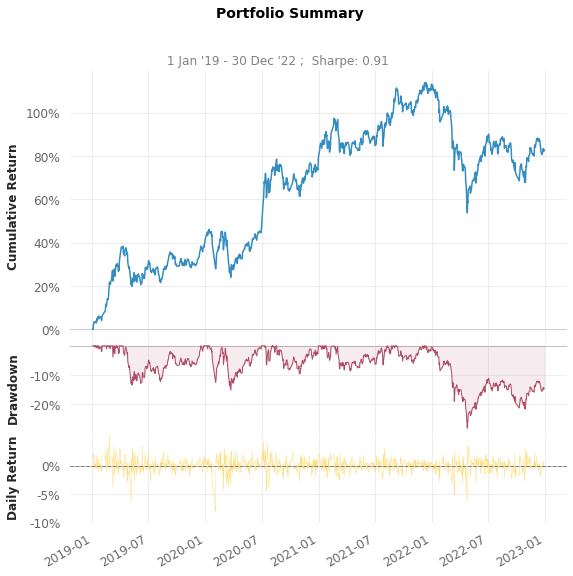

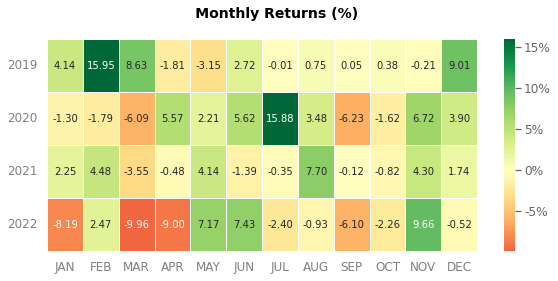

In [15]:
qs.reports.basic(total_fund/INIT_FUND)